###  To install polsartools type ``pip install polsartools``
If the above fails because of gdal package, 
try to install gdal using `conda install gdal -c conda-forge`, then install `polsartools`

In [1]:
import polsartools as pst
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np


In [2]:

def read_rst(file):
    ds = gdal.Open(file)
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    arr[arr==0] = np.nan
    return arr


def plot_images(*filenames, lower_percentile=2, upper_percentile=98, max_cols=4):
    # Function to compute vmin and vmax based on nanpercentiles
    def compute_vmin_vmax(data):
        data_no_nan = data[np.isfinite(data)]  # Remove NaNs
        vmin = np.percentile(data_no_nan, lower_percentile)
        vmax = np.percentile(data_no_nan, upper_percentile)
        return vmin, vmax
    
    # Number of images to plot
    num_images = len(filenames)

    # Calculate the number of rows and columns
    ncols = min(max_cols, num_images)  # Use max_cols but limit it to num_images
    nrows = np.ceil(num_images / ncols).astype(int)  # Calculate number of rows

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten() 

    for i, filename in enumerate(filenames):
        data = read_rst(filename)  # Load the data from the file
        vmin, vmax = compute_vmin_vmax(data)
        ax = axes[i]
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        ax.set_title(os.path.basename(filename))
        fig.colorbar(im, ax=ax)

    # Turn off any unused axes
    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

#### 1. Extract multilooked T3/C3 matrix elements

In [3]:
# Provide path to the extracted folder
dataFolder = r"ch2_sar_ncxl_20191027t200452317_d_fp_g26"

#The follwoing function extracts T3/C3 matrix from Chandrayaan-II FP data

pst.chyaan2_fp(dataFolder,matrix='C3')


Using multi-look factor: azlks = 42, rglks = 1
Execution time for chyaan2_fp: 29.03 seconds


#### 2. Speckle filtering using polarimetric refined-Lee filter (optional)

In [4]:
"""
The following function generates speckel filtered polarimetric matrices using refined lee polarimetric speckle filter: 
        
input C3/T3/C2/T2 folder path, window_size between 3-31  

"""

C3Folder = os.path.join(dataFolder,'C3')
window_size = 3
pst.rlee(C3Folder,window_size=window_size)

Progress : 100%|███████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.66 block/s]


Saved file ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3\C3\C11.bin
Saved file ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3\C3\C12_real.bin
Saved file ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3\C3\C12_imag.bin
Saved file ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3\C3\C13_real.bin
Saved file ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3\C3\C13_imag.bin
Saved file ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3\C3\C22.bin
Saved file ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3\C3\C23_real.bin
Saved file ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3\C3\C23_imag.bin
Saved file ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3\C3\C33.bin
Execution time for rlee: 3.30 seconds


#### 3. Generate a quick look Pauli RGB from C3/T3 matrix (optional)

Pauli RGB image saved as ./ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3\PauliRGB.png
Execution time for pauliRGB: 0.67 seconds


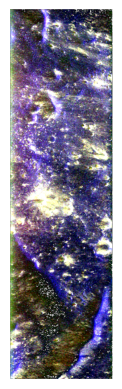

In [5]:
# update the C3 folder based on your folder
C3Folder = './ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3'

pst.utils.pauliRGB(C3Folder)

#### 4. Generating Decomposition parameters

#### 4.1. Generate H/A/α Decomposition parameters

Progress : 100%|███████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.03s/ block]


Saved file ./ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3\H_fp.tif
Saved file ./ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3\alpha_fp.tif
Saved file ./ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3\anisotropy_fp.tif
Saved file ./ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3\e1_norm.tif
Saved file ./ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3\e2_norm.tif
Saved file ./ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3\e3_norm.tif
Execution time for halphafp: 4.94 seconds


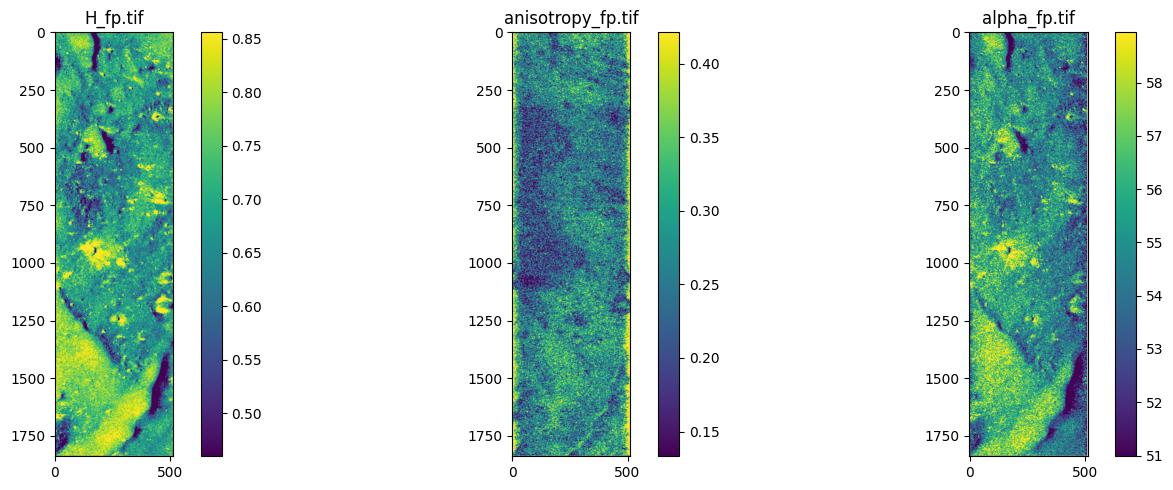

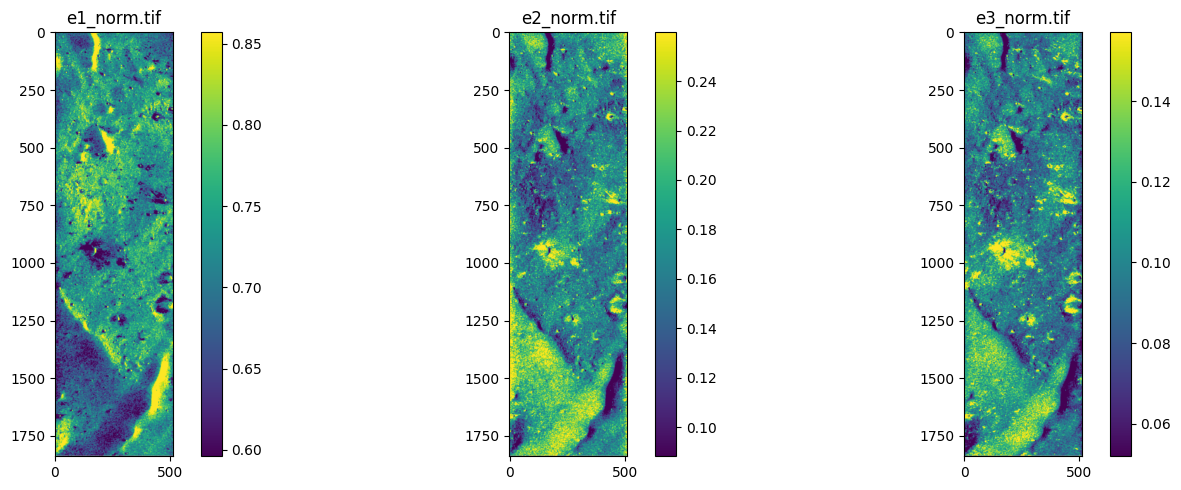

In [6]:

"""
The following function generates H/A/alpha demposition paramters: 
        Alpha, entropy, anisotropy and 
        normalized eigen values e1_norm, e2_norm, e3_norm in geotif format

input C3/T3 folder path, window_size is optional  

"""
# update the C3 folder based on your folder
C3Folder = './ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3'

pst.halphafp(C3Folder,window_size=3) 


### Plotting
plot_images(os.path.join(C3Folder,'H_fp.tif'),
             os.path.join(C3Folder,'anisotropy_fp.tif'),
              os.path.join(C3Folder,'alpha_fp.tif'))

plot_images(os.path.join(C3Folder,'e1_norm.tif'),
             os.path.join(C3Folder,'e2_norm.tif'),
             os.path.join(C3Folder,'e3_norm.tif'))




#### 4.2. Generate Yamaguchi 4-Component Decomposition parameters

In [7]:
"""
The following function generates Yamaguchi 4-Component Decomposition parameters: 
        Yam4co_odd, Yam4co_dbl, Yam4co_vol and Yam4co_hlx in geotif format

input C3/T3 folder path, window_size is optional  

"""

pst.yam4cfp(C3Folder,window_size=3) 

Progress : 100%|███████████████████████████████████████████████████████████████████████████| 4/4 [00:18<00:00,  4.58s/ block]


Saved file ./ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3\Yam4co_odd.tif
Saved file ./ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3\Yam4co_dbl.tif
Saved file ./ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3\Yam4co_vol.tif
Saved file ./ch2_sar_ncxl_20191027t200452317_d_fp_g26_rlee_3x3/C3\Yam4co_hlx.tif
Execution time for yam4cfp: 19.14 seconds


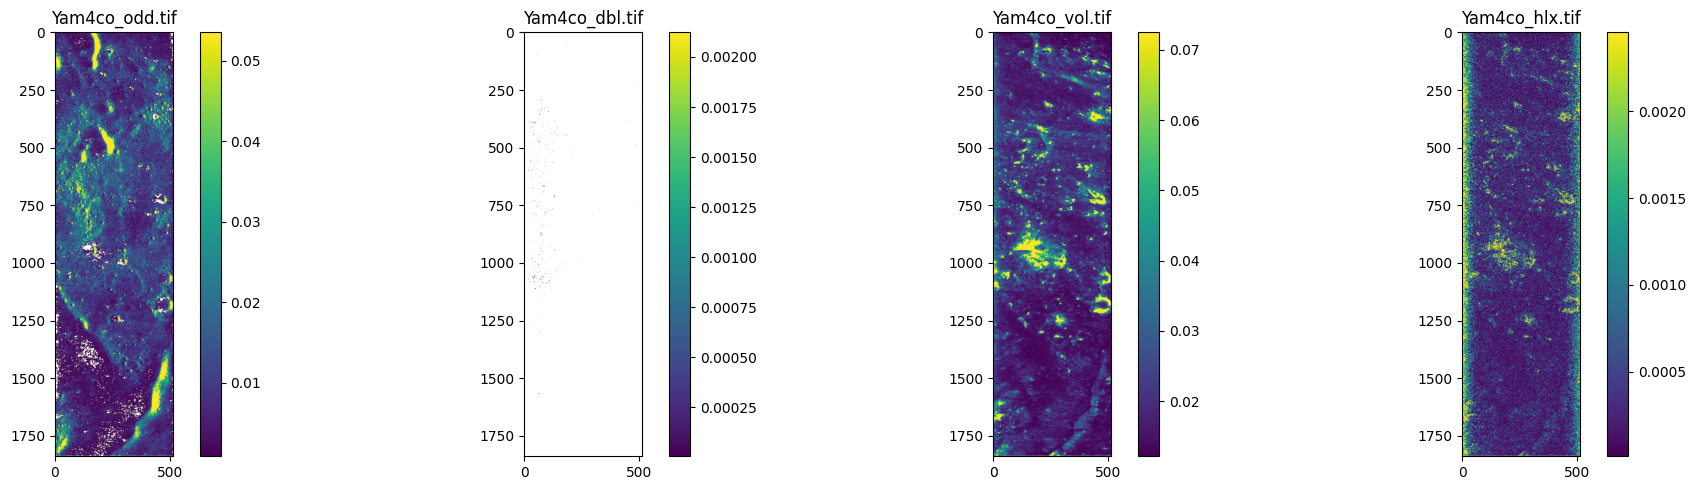

In [8]:
### Plotting
plot_images(os.path.join(C3Folder,'Yam4co_odd.tif'),
            os.path.join(C3Folder,'Yam4co_dbl.tif'),
            os.path.join(C3Folder,'Yam4co_vol.tif'),
            os.path.join(C3Folder,'Yam4co_hlx.tif'),
           )